Markowitz efficient frontier states investors should consider multiple securities in a portfolio rather than individually. A portfolio that contains combination of securities with low correlation can benefit from a diversification effect. Meaning investors can optimize their return without assuming additional risk. Markowitz 

In [5]:
import numpy as np 
import pandas as pd 
from pandas_datareader import data as web
import matplotlib.pyplot as plt
%matplotlib inline

WE will download the data on PG stock and ^GSPC

In [2]:
tickers = ["PG", "^GSPC"]
data = pd.DataFrame()
for t in tickers:
    data[t] = web.DataReader(t, data_source = "yahoo", start = "2010-1-1")["Adj Close"]

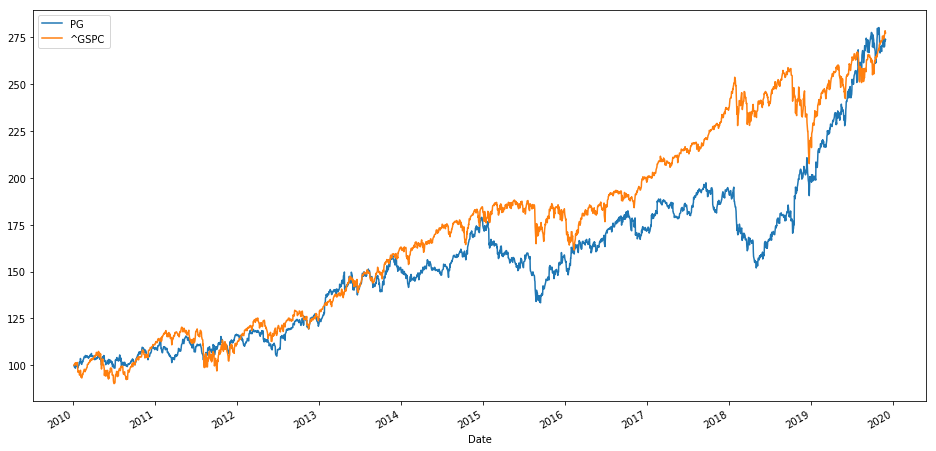

In [4]:
#normalize the data
(data/data.iloc[0]*100).plot(figsize = (16,8))
plt.show()

Calculate the daily change, returns of both securties

In [51]:
simple_returns = (data/data.shift(1)) - 1

In [52]:
#we will check if the data matches and have equal values - > 2494 PG and 2494 ^GSPC
simple_returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2495 entries, 2010-01-04 to 2019-11-29
Data columns (total 2 columns):
PG       2494 non-null float64
^GSPC    2494 non-null float64
dtypes: float64(2)
memory usage: 58.5 KB


In [53]:
#check the tail end of the data to check for most current date
simple_returns.tail()

,PG,^GSPC
Date,,
2019-11-22,-0.000415,0.002175
2019-11-25,0.001829,0.007507
2019-11-26,0.014522,0.002196
2019-11-27,-0.004090,0.004174
2019-11-29,0.002464,-0.004011


In [11]:
simple_returns.cov() * 250

,PG,^GSPC
PG,0.021868,0.011354
^GSPC,0.011354,0.021763


In [54]:
#the correlation between PF and ^GSPC is positive but low so the portfolio should benefit from 
#markowitz diversification effect
simple_returns.corr()

,PG,^GSPC
PG,1.000000,0.520464
^GSPC,0.520464,1.000000


In [57]:
# portfolio optimization -> We will need the count of securities in the portfolio
port_asset = len(tickers)
print(f"The number of securties in the portfolio is {port_asset}")

The number of securties in the portfolio is 2


WE will need the expected returns and the volatility to simulate a mean variance combination with 1000 simulations. WE are considering 1000 combinations of the same 2 assets of their weight values not 1000 different investments.

In [58]:
#Bellow we will run a simulation of 1000 differenct portfolio that contain PG and ^GSPC to test Markowitz theory.
#This Will provide us with both 1000 different expected returns and 1000 volatility values

portfolio_returns = []
portfolio_volatilities = []

for x in range(1000):
    weights = np.random.random(port_asset)
    weights /= np.sum(weights)
    portfolio_returns.append(np.sum(weights * simple_returns.mean()) * 250)
    portfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(simple_returns.cov() * 250, weights))))
    
    # we will need to convert the volatilities and and the ezpected returns into a numpy array 
port_Returns = np.array(portfolio_returns)
port_Vol = np.array(portfolio_volatilities)

In [60]:
#lets create a data fram containing the data 
portfolios = pd.DataFrame({"Returns": port_Returns, "Volatility": portfolio_volatilities})

In [61]:
portfolios.head()

,Returns,Volatility
0,0.112761,0.132366
1,0.112363,0.129450
2,0.112482,0.128782
3,0.112670,0.130430
4,0.112502,0.128800


In [62]:
portfolios.tail()

,Returns,Volatility
995,0.112449,0.128836
996,0.112493,0.128787
997,0.112543,0.128953
998,0.112838,0.134600
999,0.112159,0.133605


In [63]:
portfolios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
Returns       1000 non-null float64
Volatility    1000 non-null float64
dtypes: float64(2)
memory usage: 15.7 KB


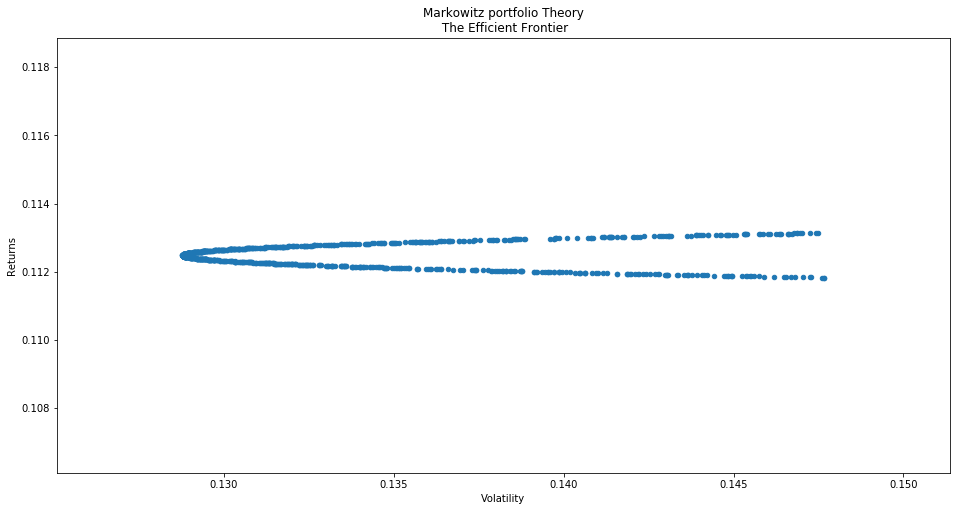

In [66]:
portfolios.plot(x ="Volatility", y ="Returns", kind = "scatter", figsize = (16,8))
plt.title("Markowitz portfolio Theory\n The Efficient Frontier")
plt.show()

THe above graph shows a set of 1000 portfolios of different weights containing PG & ^GSPC,  and displays the typical shape of Markowitz efficient portfolio. There are a set of efficient portfoilios that can provide a higher rate of return for the same or lower risk. The starting point is the minimum variance portfolio. 